<a href="https://colab.research.google.com/github/yair-brama/portfolio/blob/main/car_prices_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Context
1.   What is the parameter that contribute more than others to change the price?
2.   What months/days are better for selling?
3.   What is the most sold company/model/type/size
4.   What are the 5 top sold colors?
5.   What dynamic dashboards can we create?



In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/car_sales/clean_car_prices.csv')

In [4]:
df.describe(include=object).T

,count,unique,top,freq
COMPANY,499769,90,Ford,80413
MODEL,499769,916,Altima,17656
TYPE,499769,1841,Base,50526
SIZE,499769,45,sedan,220143
transmission,499769,2,automatic,484087
state,499769,38,fl,73285
color,499769,19,black,104804
interior,499769,16,black,227274
seller,499769,12475,nissan-infiniti lt,18041
sale Day,499769,7,Tue,150654


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
condition,499781.000,30.674,13.294,1.000,24.000,34.000,41.000,49.000
odometer,499781.000,67295.162,52355.730,1.000,28431.000,51677.000,97292.000,999999.000
mmr,499781.000,13827.287,9525.646,25.000,7375.000,12350.000,18300.000,182000.000
sellingprice,499781.000,13678.202,9597.792,1.000,7100.000,12200.000,18200.000,230000.000
Sale year,499781.000,2014.922,0.269,2014.000,2015.000,2015.000,2015.000,2015.000


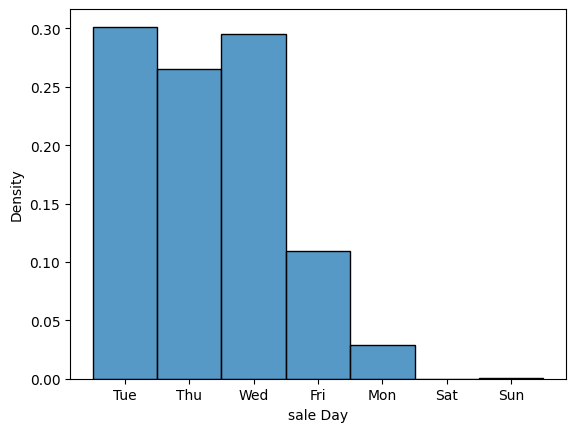

In [5]:
sns.histplot(data=df,x='sale Day',stat='density')
plt.show()

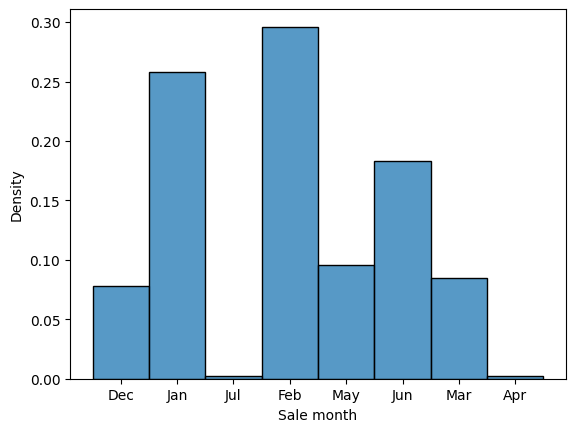

In [6]:
sns.histplot(data=df,x='Sale month',stat='density')
plt.show()

In [7]:
grouped = df.groupby(['COMPANY', 'MODEL', 'TYPE', 'SIZE']).size().reset_index(name='count')
grouped.sort_values(by='count', ascending=False).head(10)

,COMPANY,MODEL,TYPE,SIZE,count
2864,Nissan,Altima,2.5 S,sedan,9376
1469,Ford,Fusion,SE,sedan,7054
2862,Nissan,Altima,2.5,sedan,5849
3566,Toyota,Camry,LE,sedan,5616
1433,Ford,Focus,SE,sedan,4649
1010,Chrysler,Town and Country,Touring,minivan,4369
1113,Dodge,Grand Caravan,SXT,minivan,4363
1878,Hyundai,Elantra,GLS,sedan,4270
1926,Hyundai,Sonata,GLS,sedan,4203
3602,Toyota,Corolla,LE,sedan,4011


                 condition_group  odometer    mmr  sellingprice
condition_group            1.000    -0.320  0.281         0.322
odometer                  -0.320     1.000 -0.583        -0.577
mmr                        0.281    -0.583  1.000         0.984
sellingprice               0.322    -0.577  0.984         1.000


<function matplotlib.pyplot.show(close=None, block=None)>

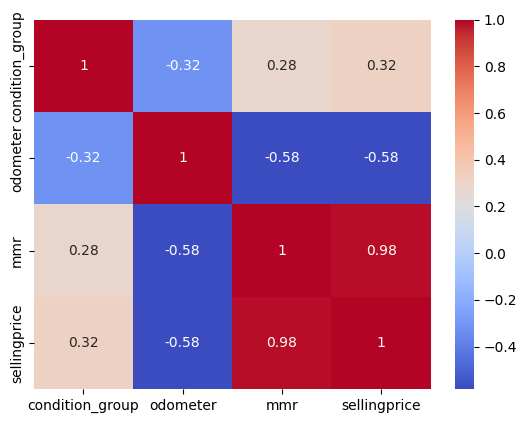

In [19]:
selected_columns = df[['condition_group','odometer','mmr','sellingprice']]
correlation_matrix = selected_columns.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show

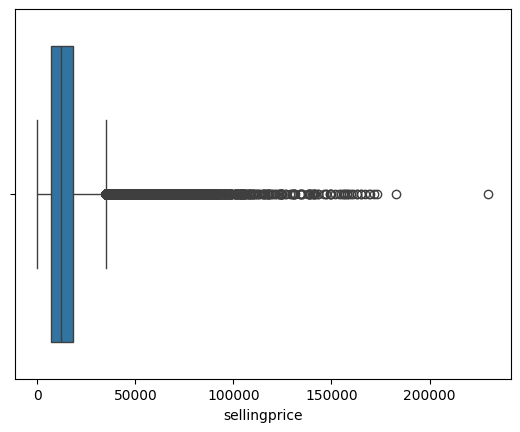

In [9]:
sns.boxplot(x=df['sellingprice'])
plt.show()

In [10]:
grouped_price = df.groupby(['COMPANY', 'MODEL', 'TYPE', 'SIZE'])['sellingprice'].mean().reset_index()

In [11]:
grouped_price.sort_values(by='sellingprice', ascending=False)

,COMPANY,MODEL,TYPE,SIZE,sellingprice
1229,Ferrari,458 Italia,Base,coupe,183000.000
3241,Rolls-Royce,Ghost,EWB,sedan,169000.000
2714,Mercedes-Benz,SLS AMG GT,Base,coupe,156500.000
411,BMW,i8,Base,coupe,154222.222
3240,Rolls-Royce,Ghost,Base,sedan,152807.143
...,...,...,...,...,...
1510,Ford,Ranger,S,regular cab,200.000
2850,Nissan,300ZX,GS,hatchback,200.000
4024,Volvo,850,GLTS,wagon,200.000
3600,Toyota,Corolla,Deluxe,wagon,200.000


In [ ]:
MC = pd.crosstab(df['COMPANY'],df["color"])
MC

color,beige,black,blue,brown,burgundy,charcoal,gold,gray,green,lime,off-white,orange,pink,purple,red,silver,turquoise,white,yellow
COMPANY,,,,,,,,,,,,,,,,,,,
Acura,34,1663,321,21,137,6,94,1223,76,0,32,2,0,9,177,889,2,901,0
Aston Martin,0,11,2,0,0,1,0,5,1,0,0,0,0,0,0,2,0,1,0
Audi,45,1737,557,41,2,4,41,883,27,0,2,1,0,4,165,821,1,1024,3
BMW,175,5991,1903,201,58,8,144,3685,219,0,3,14,1,9,524,2044,6,3477,1
Bentley,0,35,23,2,0,1,0,20,2,0,0,0,0,0,2,13,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
subaru,2,7,6,1,1,0,3,2,6,0,0,0,0,0,2,6,0,3,0
suzuki,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
toyota,2,12,7,1,4,0,5,9,10,0,0,0,0,1,3,7,0,11,0


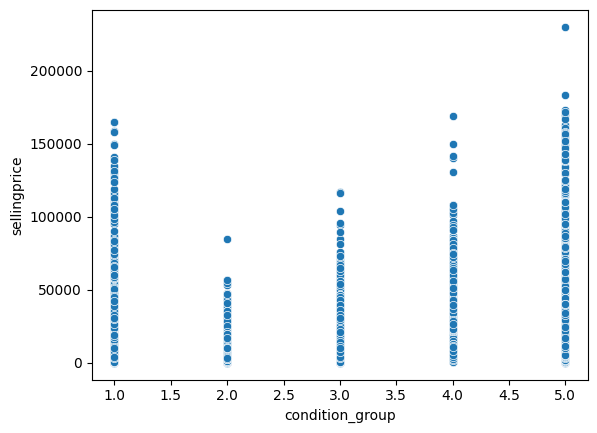

In [12]:
# prompt: scatterplot showing condition and sellingprice

import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='condition_group', y='sellingprice')
plt.show()


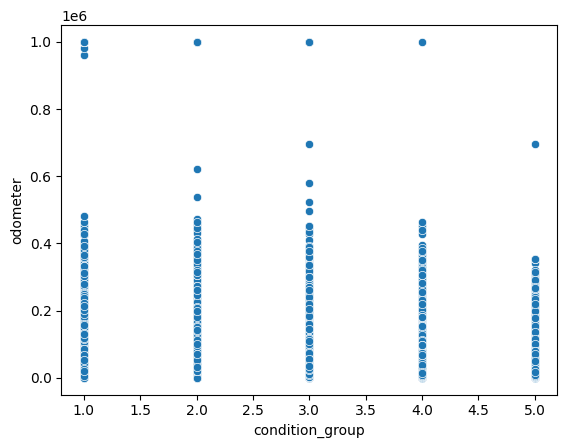

In [13]:
# prompt: scatterplot of condition and odometer

import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='condition_group', y='odometer')
plt.show()


In [16]:
pd.crosstab(df['COMPANY'],df["condition_group"])

condition_group,1,2,3,4,5
COMPANY,,,,,
Acura,505,612,1437,1877,1156
Aston Martin,1,0,3,12,7
Audi,557,345,1176,1699,1581
BMW,1665,1046,3528,5678,6546
Bentley,10,3,13,42,41
...,...,...,...,...,...
subaru,7,11,16,4,1
suzuki,0,0,1,2,0
toyota,11,14,27,12,8


In [17]:
def countplot(col, label, rotation=0, size=(12,6)):
    '''
    Create Count Plot using seaborn library.
    It takes four arguments.

    col (str): The column used to create countplot
    label (str): Name of x-label and it is also used as title.
    rotation (int): How much you want to rotate the x-ticks.
    size (tuple): It is a tuple and takes the size for figure in (width, height) format.
    '''
    plt.figure(figsize=size)
    plt.title(f'Count by Car {label}', fontsize=20)
    sns.countplot(x=df[col], palette='viridis')
    plt.xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    plt.ylabel('Count', fontsize=16)

<ipython-input-17-20c7adabe640>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


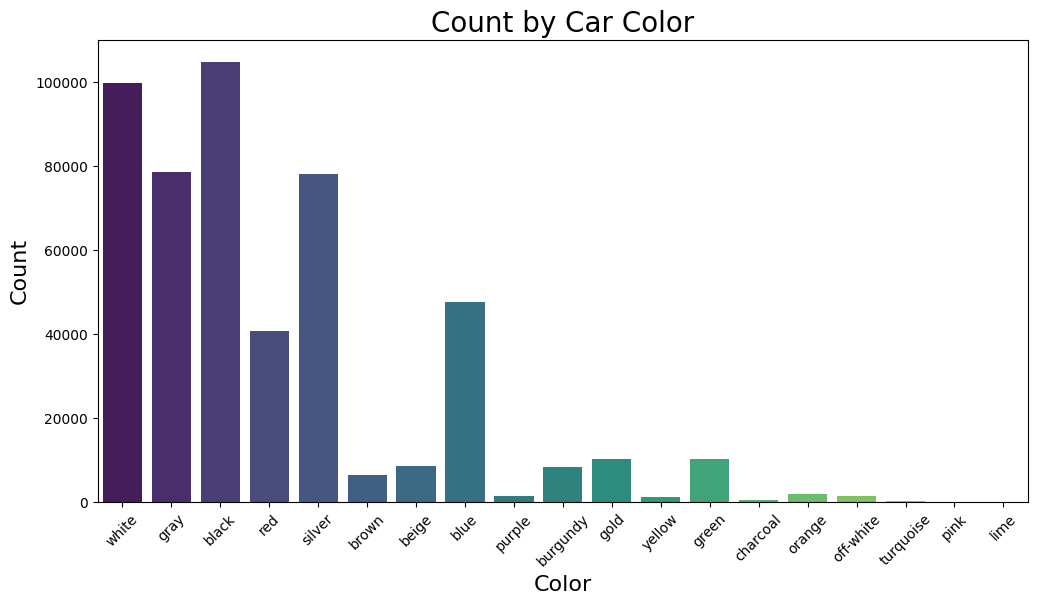

In [18]:
countplot('color', 'Color', 45)